<a href="https://colab.research.google.com/github/NguyenNgocQuyen29/BaiTap_AI/blob/main/BTVNTuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
*Họ và tên:   Nguyễn Thị Ngọc Quyên
*MSSV       :         20146523
Lớp thứ hai: T1-3


In [38]:

pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2.0712820512820516


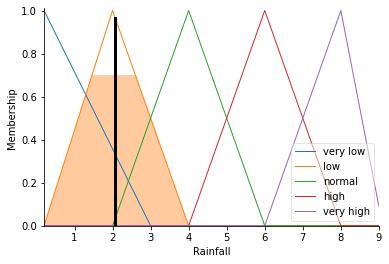

In [49]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
#Khai báo
WindSpeed = ctrl.Antecedent(np.arange(0.7,3.1,0.05), 'WindSpeed')
Temp = ctrl.Antecedent(np.arange(20.4,41.2,0.1), 'Temp')
Rainfall = ctrl.Consequent(np.arange(0.2,9.1,0.1), 'Rainfall')
     

#Các hàm liên thuộc
WindSpeed['very low'] = fuzz.trimf(WindSpeed.universe, [0,0,0.7])
WindSpeed['low'] = fuzz.trimf(WindSpeed.universe, [0,1,1.5])
WindSpeed['normal'] = fuzz.trimf(WindSpeed.universe, [1,1.5,2.0])
WindSpeed['high'] = fuzz.trimf(WindSpeed.universe, [1.5,2,2.5])
WindSpeed['very high'] = fuzz.trimf(WindSpeed.universe, [2,2.5,3.2])

Temp['very low'] = fuzz.trimf(Temp.universe, [20.4,20.4,25.5])
Temp['low'] = fuzz.trimf(Temp.universe, [20.4,25.5,30])
Temp['normal'] = fuzz.trimf(Temp.universe, [25.5,30,33])
Temp['high'] = fuzz.trimf(Temp.universe, [30,33,37])
Temp['very high'] = fuzz.trimf(Temp.universe, [33,37,41.2])

Rainfall['very low'] = fuzz.trimf(Rainfall.universe, [0.2,0.2,3])
Rainfall['low'] = fuzz.trimf(Rainfall.universe, [0.2,2,4])
Rainfall['normal'] = fuzz.trimf(Rainfall.universe, [2,4,6])
Rainfall['high'] = fuzz.trimf(Rainfall.universe, [4,6,8])
Rainfall['very high'] = fuzz.trimf(Rainfall.universe, [6,8,9.1])
     

#Tạo luật
rule1 = ctrl.Rule(WindSpeed['very low'] & Temp['very low'], Rainfall['very low'])
rule2 = ctrl.Rule(WindSpeed['very low'] & Temp['low'], Rainfall['very low'])
rule3 = ctrl.Rule(WindSpeed['very low'] & Temp['normal'], Rainfall['low'])
rule4 = ctrl.Rule(WindSpeed['very low'] & Temp['high'], Rainfall['low'])
rule5 = ctrl.Rule(WindSpeed['very low'] & Temp['very high'], Rainfall['low'])

rule6 = ctrl.Rule(WindSpeed['low'] & Temp['very low'], Rainfall['low'])
rule7 = ctrl.Rule(WindSpeed['low'] & Temp['low'], Rainfall['low'])
rule8 = ctrl.Rule(WindSpeed['low'] & Temp['normal'], Rainfall['low'])
rule9 = ctrl.Rule(WindSpeed['low'] & Temp['high'], Rainfall['low'])
rule10 = ctrl.Rule(WindSpeed['low'] & Temp['very high'], Rainfall['normal'])

rule11 = ctrl.Rule(WindSpeed['normal'] & Temp['very low'], Rainfall['low'])
rule12 = ctrl.Rule(WindSpeed['normal'] & Temp['low'], Rainfall['low'])
rule13 = ctrl.Rule(WindSpeed['normal'] & Temp['normal'], Rainfall['normal'])
rule14 = ctrl.Rule(WindSpeed['normal'] & Temp['high'], Rainfall['normal'])
rule15 = ctrl.Rule(WindSpeed['normal'] & Temp['very high'], Rainfall['normal'])

rule16 = ctrl.Rule(WindSpeed['high'] & Temp['very low'], Rainfall['low'])
rule17 = ctrl.Rule(WindSpeed['high'] & Temp['low'], Rainfall['low'])
rule18 = ctrl.Rule(WindSpeed['high'] & Temp['normal'], Rainfall['normal'])
rule19 = ctrl.Rule(WindSpeed['high'] & Temp['high'], Rainfall['normal'])
rule20 = ctrl.Rule(WindSpeed['high'] & Temp['very high'], Rainfall['high'])

rule21 = ctrl.Rule(WindSpeed['very high'] & Temp['very low'], Rainfall['low'])
rule22 = ctrl.Rule(WindSpeed['very high'] & Temp['low'], Rainfall['normal'])
rule23 = ctrl.Rule(WindSpeed['very high'] & Temp['normal'], Rainfall['normal'])
rule24 = ctrl.Rule(WindSpeed['very high'] & Temp['high'], Rainfall['high'])
rule25 = ctrl.Rule(WindSpeed['very high'] & Temp['very high'], Rainfall['very high'])

Rainfall_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
     

#Simun
rainfall_simulation = ctrl.ControlSystemSimulation(Rainfall_control)
rainfall_simulation.input['WindSpeed'] = 0.7
rainfall_simulation.input['Temp'] = 20.4
rainfall_simulation.compute()
print(rainfall_simulation.output['Rainfall'])
Rainfall.view(sim=rainfall_simulation)

# New Section